In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [3]:
X = 6 * np.random.rand(200,1) -3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.rand(200,1)

# y = 0.8 * X^2 + 0.9x + 2

Text(0, 0.5, 'y')

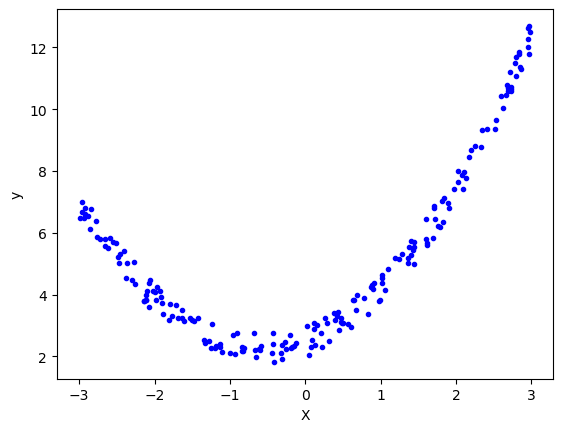

In [4]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')

In [5]:
# train - test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2, test_size=0.2)

In [6]:
# Applying Linear Regression 
lr = LinearRegression()



In [7]:
lr.fit(X_train, y_train)


LinearRegression()

In [8]:
y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred)) # please remember r2_score = r2_score(y_test,y_pred) is wrong as it changes the function r2_score , use r2 = .......

0.3563596529273497


Text(0, 0.5, 'y')

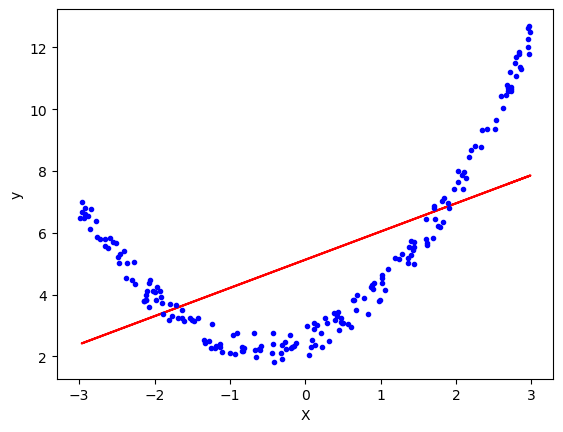

In [9]:
plt.plot(X_train,lr.predict(X_train), color ='r')
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
# as we can see we applying linear regression to polynomial data and trying to justify this, but this is not suitable for this graph

In [10]:
# Now, Applying Polynomial Linear Regression 
poly = PolynomialFeatures(degree=2, include_bias=True) # we need include_bias here in this dataset 

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
# always remember we cannot apply Polynomial feature to output column


In [11]:
print(X_train[0])
print(X_train_trans[0])

[2.96674113]
[1.         2.96674113 8.80155296]


In [12]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)


LinearRegression()

In [13]:
y_pred = lr.predict(X_test_trans)

In [14]:
r2_score(y_test,y_pred) # now we can see sudden improvement in r2_score

0.9915484927904241

In [15]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly) 

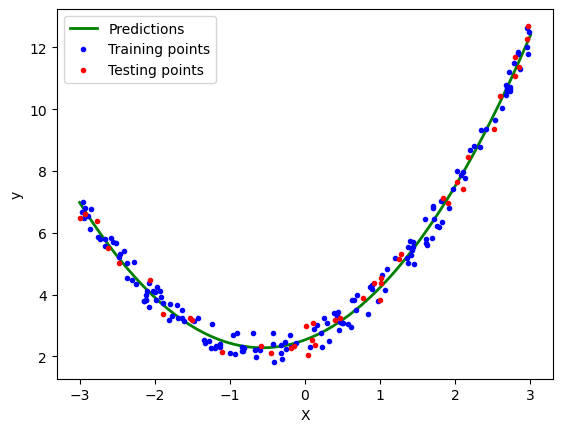

In [18]:
plt.plot(X_new, y_new, "g-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "r.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [28]:

# what if we have degree greater than 2 , let's make a function -> Reference campus x
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'g', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "r.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

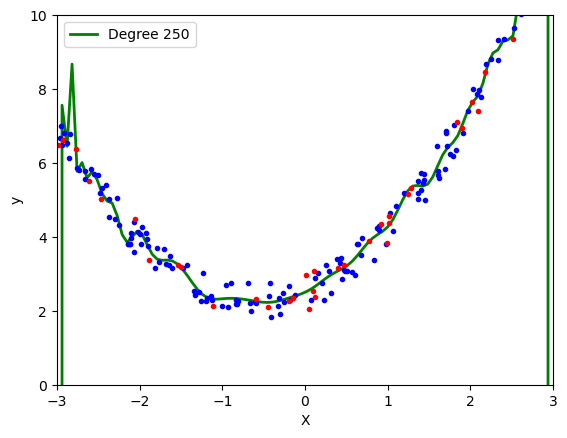

In [29]:
polynomial_regression(250) # when we increase the degree much higher than it will try learn pattern of the data rather than true essence of data

In [30]:
poly.powers_

array([[0],
       [1],
       [2]])

In [31]:
# Now what if we have multiple input column i.e., multiple polynomial regression => Code is not written by me 

In [32]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

NameError: name 'SGDRegressor' is not defined

In [34]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [35]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [36]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [37]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

NameError: name 'x_input' is not defined

In [38]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [39]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [40]:
print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

AttributeError: 'PolynomialFeatures' object has no attribute 'n_input_features_'

In [41]:
X_multi_trans.shape

(100, 496)

In [42]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [43]:
X_test_multi = poly.transform(final)

NameError: name 'final' is not defined

In [44]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [45]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()

NameError: name 'x_input' is not defined